In [374]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import skew
from sklearn import metrics
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

In [375]:
file_path = "C:/Users/Lenovo/Downloads/House_Price_Data.csv"

# Read the CSV file and store the data in a DataFrame
d = pd.read_csv(file_path)

# Display the DataFrame
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [376]:
print("Missing values in all columns:")
print(d.isnull().sum())



Missing values in all columns:
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [377]:
d['LotFrontage'] = d['LotFrontage'].fillna(d['LotFrontage'].mean()).round(1)

# Display the first 10 rows of the modified DataFrame
print(d.head(10))

# Count the total number of missing values in each column of the DataFrame
print("Missing values in all columns:")
print(d.isnull().sum())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL         70.0    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...       

In [378]:
# Fill missing values in the 'MasVnrArea' column with the mean value and round to 1 decimal place
d['MasVnrArea'] = d['MasVnrArea'].fillna(d['MasVnrArea'].mean()).round(1)

# Display the 'MasVnrArea' column of the modified DataFrame
print(d['MasVnrArea'])

# Display the summary of the modified DataFrame
print(d.info())

0       196.0
1         0.0
2       162.0
3         0.0
4       350.0
        ...  
1455      0.0
1456    119.0
1457      0.0
1458      0.0
1459      0.0
Name: MasVnrArea, Length: 1460, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-nul

In [379]:
# Fill missing values in the 'GarageYrBlt' column with the mean value and round to 1 decimal place
d['GarageYrBlt'] = d['GarageYrBlt'].fillna(d['GarageYrBlt'].mean()).round(1)

# Display the 'GarageYrBlt' column of the modified DataFrame
print(d['GarageYrBlt'])

# Display the summary of the modified DataFrame
print(d.info())

0       2003.0
1       1976.0
2       2001.0
3       1998.0
4       2000.0
         ...  
1455    1999.0
1456    1978.0
1457    1941.0
1458    1950.0
1459    1965.0
Name: GarageYrBlt, Length: 1460, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     

In [380]:
train_data,test_data=train_test_split(d,test_size=0.2,random_state=42)

In [382]:
cols_low_corr = [col for col in cols_low_corr if col in train_data.columns]

train_data = train_data.drop(cols_low_corr, axis=1)
test_data = test_data.drop(cols_low_corr, axis=1)


In [383]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 254 to 1126
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    1168 non-null   float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          74 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  Overal

In [386]:
# Impute missing values using random sampling from non-null values
for column in train_data.columns:
    null_vals = train_data.isnull().values
    non_null_vals = train_data.values[~null_vals]
    freq_dist = np.unique(non_null_vals, return_counts=True)
    prob_dist = freq_dist[1] / freq_dist[1].sum()
    train_data.loc[train_data[column].isna(), column] = np.random.choice(
        freq_dist[0], train_data[column].isnull().sum(), p=prob_dist)

# Apply log transformation to skewed features in train and test data
skewed_feats = train_data.apply(lambda x: skew(x.dropna()))
skewed_feats = skewed_feats[skewed_feats > 0.75]
train_data[skewed_feats.index] = np.log1p(train_data[skewed_feats.index])
test_data[skewed_feats.index] = np.log1p(test_data[skewed_feats.index])

# Deal with the skewness in the test data
skewed_test = test_data.apply(lambda x: skew(x.dropna()))
skewed_test = skewed_test[skewed_test > 0.75]
test_data[skewed_test.index] = np.log1p(test_data[skewed_test.index])

In [387]:
print(d["LotArea"].value_counts().sort_index())


1300      1
1477      1
1491      1
1526      1
1533      2
         ..
70761     1
115149    1
159000    1
164660    1
215245    1
Name: LotArea, Length: 1073, dtype: int64


In [388]:
print(d["MasVnrArea"].value_counts().sort_index())


0.0       861
1.0         2
11.0        1
14.0        1
16.0        7
         ... 
1115.0      1
1129.0      1
1170.0      1
1378.0      1
1600.0      1
Name: MasVnrArea, Length: 328, dtype: int64


In [389]:
print(d["YearBuilt"].value_counts().sort_index())

1872     1
1875     1
1880     4
1882     1
1885     2
        ..
2006    67
2007    49
2008    23
2009    18
2010     1
Name: YearBuilt, Length: 112, dtype: int64


In [390]:
print(d["OverallQual"].value_counts().sort_index())

1       2
2       3
3      20
4     116
5     397
6     374
7     319
8     168
9      43
10     18
Name: OverallQual, dtype: int64


In [391]:
print(d["OverallCond"].value_counts().sort_index())

1      1
2      5
3     25
4     57
5    821
6    252
7    205
8     72
9     22
Name: OverallCond, dtype: int64


In [392]:
print(d["BsmtUnfSF"].value_counts().sort_index())

0       118
14        1
15        1
23        2
26        1
       ... 
2042      1
2046      1
2121      1
2153      1
2336      1
Name: BsmtUnfSF, Length: 780, dtype: int64


In [393]:
print(d["GrLivArea"].value_counts().sort_index())

334     1
438     1
480     1
520     1
605     1
       ..
3627    1
4316    1
4476    1
4676    1
5642    1
Name: GrLivArea, Length: 861, dtype: int64


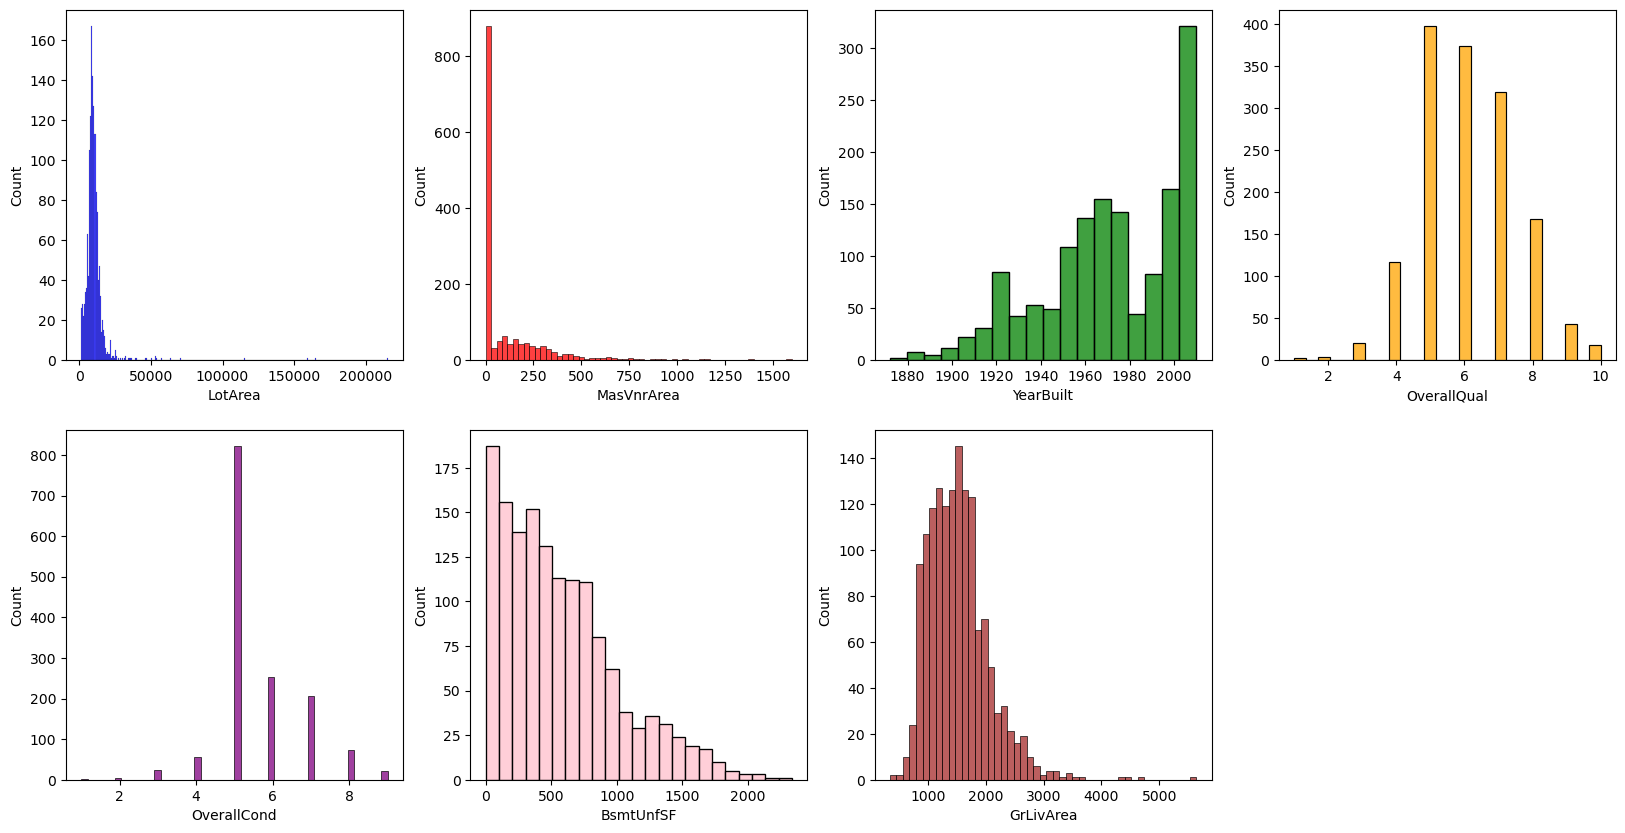

In [394]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
sns.histplot(data=d, x='LotArea', ax=axs[0, 0], color='blue')
sns.histplot(data=d, x='MasVnrArea', ax=axs[0, 1], color='red')
sns.histplot(data=d, x='YearBuilt', ax=axs[0, 2], color='green')
sns.histplot(data=d, x='OverallQual', ax=axs[0, 3], color='orange')
sns.histplot(data=d, x='OverallCond', ax=axs[1, 0], color='purple')
sns.histplot(data=d, x='BsmtUnfSF', ax=axs[1, 1], color='pink')
sns.histplot(data=d, x='GrLivArea', ax=axs[1, 2], color='brown')
fig.delaxes(axs[1,3]) # Remove the last empty subplot
plt.show()

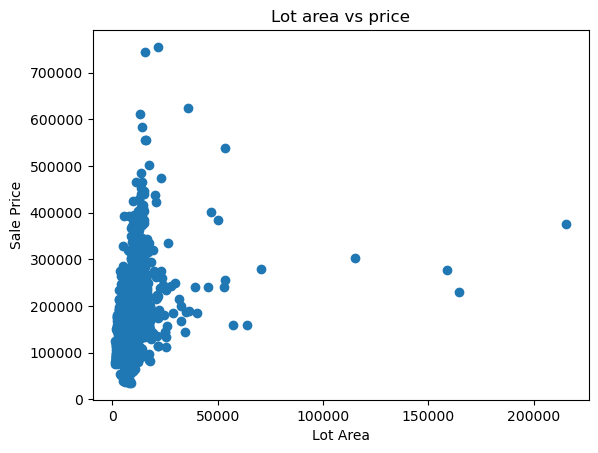

In [395]:
fig, ax = plt.subplots()
ax.scatter(d['LotArea'], d['SalePrice'])
ax.set_xlabel('Lot Area')
ax.set_ylabel('Sale Price')
ax.set_title('Lot area vs price')
plt.show()


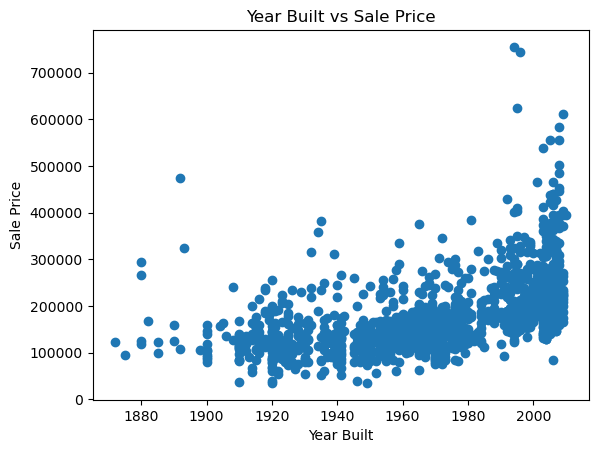

In [396]:
fig, ax = plt.subplots()
ax.scatter(x = d['YearBuilt'], y = d['SalePrice'])
ax.set_xlabel('Year Built')
ax.set_ylabel('Sale Price')
ax.set_title('Year Built vs Sale Price')
plt.show()


In [397]:
dependent_variable=train_data["SalePrice"]
independent_variable=train_data.drop("SalePrice",axis=1)


In [398]:
x_train,x_test,y_train,y_test=train_test_split(independent_variable,dependent_variable,test_size=0.2)

In [399]:
print(f"Training set shape: {x_train.shape}, {y_train.shape}")
print(f"Test set shape: {x_test.shape}, {y_test.shape}")


Training set shape: (934, 80), (934,)
Test set shape: (234, 80), (234,)


In [400]:
lr = LinearRegression()
lr.fit(x_train, y_train)

predicted_value = lr.predict(x_test)
print(predicted_value)

[11.76960257 11.9605121  12.18609853 11.97736252 11.91625066 12.11865854
 11.73138438 12.25264471 11.79038132 11.82445544 12.32351557 11.95393557
 11.99610199 12.2288227  12.89378449 12.02914455 11.65977669 11.54589549
 11.79650342 12.1526849  11.80799413 11.39715314 12.44819442 11.62209262
 11.74206283 12.14890065 11.53396138 11.78990297 12.34293503 13.7513948
 11.13839138 11.51396499 11.92334952 12.10830775 11.39086989 11.9083262
 12.20698211 11.70000362 11.51098087 11.61232009 11.70227177 11.99880797
 11.44591019 12.7000369  12.60061929 11.85426259 11.3618429  11.40924403
 12.12765866 11.97536791 11.83443661 11.29295822 12.10764971 11.8004372
 11.84386733 12.07747974 12.27016013 11.88264829 12.20504192 11.88603524
 11.84868241 11.6808617  12.13584911 11.65937906 11.44966472 11.80346322
 11.15857562 12.49257709 12.14048969 11.76151858 12.30040532 11.7244656
 11.9804236  11.36131572 11.8276146  12.08091546 12.33283375 11.93298608
 11.70439588 12.12978263 12.449899   12.15190665 12.483

In [401]:
print('Actual values: ', y_test)

Actual values:  808     11.982623
1383    11.626263
977     12.205578
1193    12.013707
893     12.013707
          ...    
1090    11.439290
191     12.122696
609     11.682677
0       12.247699
1011    11.512935
Name: SalePrice, Length: 234, dtype: float64


In [402]:
mae = n.mean(n.abs(y_test - predicted_value))
mse = n.mean((y_test - predicted_value) ** 2)
rmse = n.sqrt(mse)
r_squared = 1 - (n.sum((y_test - predicted_value) ** 2) / ((len(y_test) - 1) * n.var(y_test, ddof=1)))
adjusted_r_squared = 1 - (((1 - r_squared) * (len(y_test) - 1)) / (len(y_test) - x_test.shape[1] - 1))

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R square:", r_squared)
print("Adjusted R square:", adjusted_r_squared)

Mean Absolute Error: 0.08863874536216333
Mean Squared Error: 0.02617206777866785
Root Mean Squared Error: 0.16177783463338805
R square: 0.8087298224639071
Adjusted R square: 0.7087192721182376


In [451]:
from sklearn.metrics import r2_score

# calculate R^2 score
r2 = r2_score(y_test, predicted_value)

# print R^2 score
print("Accuracy R^2 score:", r2)



Accuracy R^2 score: 0.8087298224639072


Text(0.5, 1.0, 'Linear Regression Model')

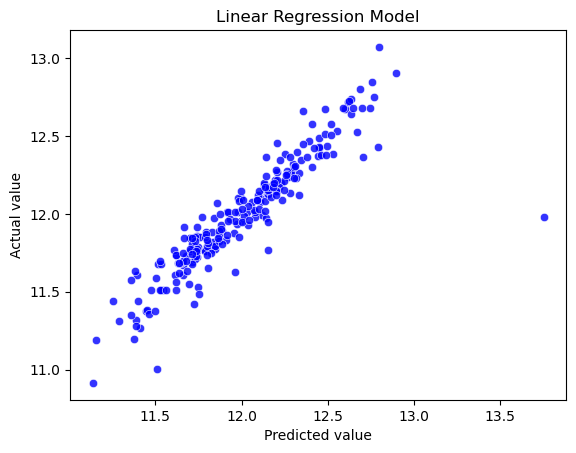

In [403]:
sns.scatterplot(x=predicted_value, y=y_test, alpha=0.8, color='blue')
plt.xlabel('Predicted value')
plt.ylabel('Actual value')
plt.title('Linear Regression Model')

In [404]:
#USING SVM MODEL

In [459]:
from sklearn.datasets import make_classification

X, Y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=42)

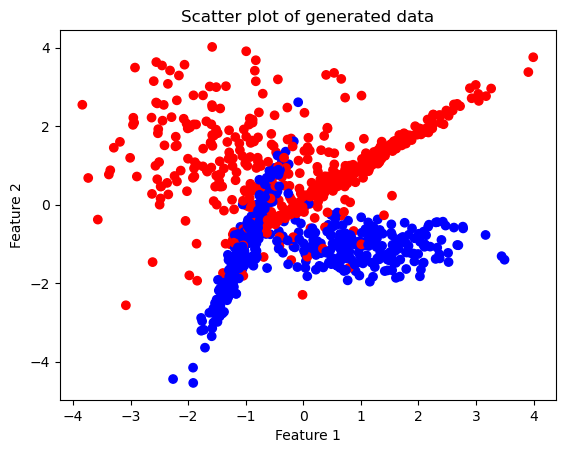

In [460]:
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='bwr')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter plot of generated data')
plt.show()


In [461]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [462]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(X_train, Y_train)


LinearSVC()

In [463]:
from sklearn.metrics import accuracy_score

Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.875


In [410]:
from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))

print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))

Confusion Matrix:
[[85  6]
 [16 93]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.89        91
           1       0.94      0.85      0.89       109

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.89      0.89       200



In [431]:
#PCA LDA

In [465]:
d['LotFrontage']=d['LotFrontage'].round(1)
d['MasVnrArea']=d['MasVnrArea'].round(1)
d['GarageYrBlt']=d['GarageYrBlt'].round(1)
d.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,2,3,3,0,...,0,3,4,4,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,2,3,3,0,...,0,3,4,4,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,2,0,3,0,...,0,3,4,4,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,2,0,3,0,...,0,3,4,4,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,2,0,3,0,...,0,3,4,4,0,12,2008,8,4,250000


In [466]:
from sklearn import preprocessing

# Create a LabelEncoder object
le = preprocessing.LabelEncoder()

# Apply LabelEncoder to all non-numeric columns
d[d.select_dtypes(include=['object']).columns] = d[d.select_dtypes(include=['object']).columns].apply(le.fit_transform)

# Print the updated dataframe
print(d.head())


   Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0   1          60         3         65.0     8450       1      2         3   
1   2          20         3         80.0     9600       1      2         3   
2   3          60         3         68.0    11250       1      2         0   
3   4          70         3         60.0     9550       1      2         0   
4   5          60         3         84.0    14260       1      2         0   

   LandContour  Utilities  ...  PoolArea  PoolQC  Fence  MiscFeature  MiscVal  \
0            3          0  ...         0       3      4            4        0   
1            3          0  ...         0       3      4            4        0   
2            3          0  ...         0       3      4            4        0   
3            3          0  ...         0       3      4            4        0   
4            3          0  ...         0       3      4            4        0   

   MoSold  YrSold  SaleType  SaleCondition  

In [467]:
X = d.drop(["MSZoning","GarageFinish","Heating","HeatingQC","CentralAir","Electrical","Street","Alley","LotShape","LotFrontage","LandContour","Utilities","LotConfig","LandSlope","Neighborhood","Condition1","Condition2","BldgType","HouseStyle","RoofStyle","RoofMatl","Exterior1st","Exterior2nd","MasVnrType","ExterQual","ExterCond","Foundation","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","KitchenQual","Functional","FireplaceQu","GarageType","GarageQual","GarageCond","PavedDrive","PoolQC","Fence","MiscFeature","SaleType","SaleCondition"],axis=1)
Y = d["GarageFinish"]


In [468]:
n_samples = X.shape[0]
print("Number of samples in X:", n_samples)


Number of samples in X: 1460


In [469]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, roc_curve, RocCurveDisplay, auc
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np


X=d.drop(["MSZoning","GarageFinish","Heating","HeatingQC","CentralAir","Electrical","Street","Alley","LotShape","LotFrontage","LandContour","Utilities","LotConfig","LandSlope","Neighborhood","Condition1","Condition2","BldgType","HouseStyle","RoofStyle","RoofMatl","Exterior1st","Exterior2nd","MasVnrType","ExterQual","ExterCond","Foundation","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","KitchenQual","Functional","FireplaceQu","GarageType","GarageQual","GarageCond","PavedDrive","PoolQC","Fence","MiscFeature","SaleType","SaleCondition"],axis=1)
Y=d["GarageFinish"]
# split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

# perform PCA and LDA
pca = PCA(n_components=2, svd_solver='auto')
lda = LDA(n_components=2, solver='svd')

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
X_train_lda = lda.fit_transform(X_train, Y_train)
X_test_lda = lda.transform(X_test)

# train SVM models on transformed data
svm_pca = SVC(kernel='rbf', gamma='auto')
svm_lda = SVC(kernel='rbf', gamma='auto')
svm_pca.fit(X_train_pca, Y_train)
svm_lda.fit(X_train_lda, Y_train)

# make predictions and calculate accuracy scores
Y_pred_pca = svm_pca.predict(X_test_pca)
Y_pred_lda = svm_lda.predict(X_test_lda)
pca_accuracy = accuracy_score(Y_test, Y_pred_pca)
lda_accuracy = accuracy_score(Y_test, Y_pred_lda)

print("PCA Accuracy Score : ", pca_accuracy, "\n", "LDA Accuracy Score : ", lda_accuracy)


PCA Accuracy Score :  0.4315068493150685 
 LDA Accuracy Score :  0.6506849315068494


PRINCIPAL COMPONENT ANALYSIS
Confusion Matrix:
 [[ 0  0 32  0]
 [ 0  0 43  0]
 [ 0  0 63  0]
 [ 0  0  8  0]]
Precision: 0.4315068493150685
Recall: 0.4315068493150685
F1-score: 0.4315068493150685
ROC curve


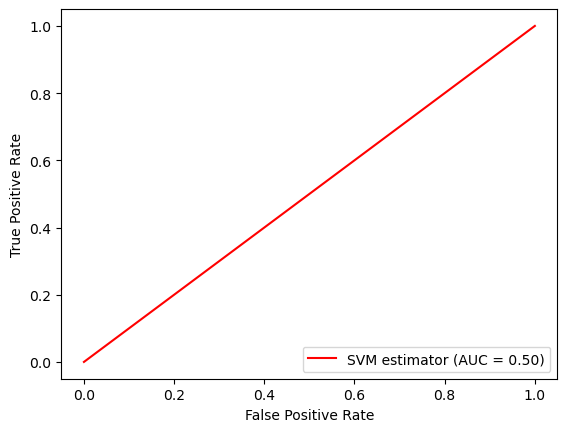

In [470]:
print("PRINCIPAL COMPONENT ANALYSIS")
print("Confusion Matrix:\n",confusion_matrix(Y_test, Y_pred_pca))
print("Precision:",precision_score(Y_test,Y_pred_pca,average='micro'))
print("Recall:",recall_score(Y_test,Y_pred_pca,average='micro'))
print("F1-score:",f1_score(Y_test,Y_pred_pca,average='micro'))
print("ROC curve")
f_positive_rate, t_positive_rate, thresholds = roc_curve(Y_test,Y_pred_pca, pos_label=2)
roc_auc = auc(f_positive_rate, t_positive_rate)
display = RocCurveDisplay(fpr=f_positive_rate, tpr= t_positive_rate, roc_auc=roc_auc,estimator_name='SVM estimator')
display.plot(color='red')
plt.show()

LINEAR DISCRIMINANT ANALYSIS
Confusion Matrix:
 [[14 12  6  0]
 [ 9 21 13  0]
 [ 2  7 54  0]
 [ 0  0  2  6]]
Precision: 0.6506849315068494
Recall: 0.6506849315068494
F1-score: 0.6506849315068494
ROC curve


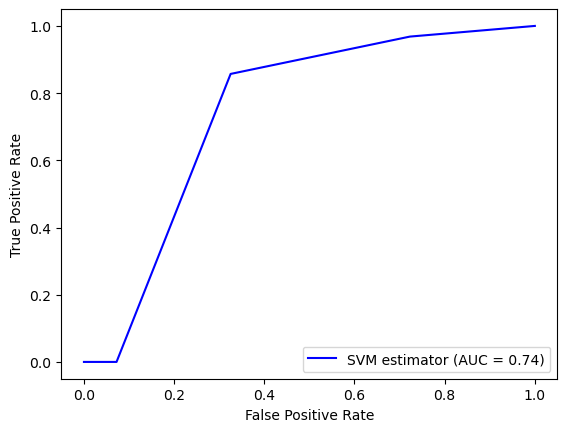

In [471]:
print("LINEAR DISCRIMINANT ANALYSIS")
print("Confusion Matrix:\n",confusion_matrix(Y_test, Y_pred_lda))
print("Precision:",precision_score(Y_test,Y_pred_lda,average='micro'))
print("Recall:",recall_score(Y_test,Y_pred_lda,average='micro'))
print("F1-score:",f1_score(Y_test,Y_pred_lda,average='micro'))
print("ROC curve")
f_positive_rate, t_positive_rate, thresholds = roc_curve(Y_test,Y_pred_lda, pos_label=2)
roc_auc = auc(f_positive_rate, t_positive_rate)
display = RocCurveDisplay(fpr=f_positive_rate, tpr= t_positive_rate, roc_auc=roc_auc,estimator_name='SVM estimator')
display.plot(color='blue')
plt.show()


In [472]:
models = pd.DataFrame({
    
    'Model': ['Linear Regression', 'SVM', 'PCA', 'LDA'],
    'Scores':[r2, accuracy, pca_accuracy, lda_accuracy]                  
})

models.sort_values(by='Scores', ascending=True)


,Model,Scores
2,PCA,0.431507
3,LDA,0.650685
0,Linear Regression,0.808730
1,SVM,0.875000
